In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Ayush/combined_filtered_data.csv"

#use collections to get a count frequency of each tuple
from collections import Counter

In [2]:
#read the comparison dataset
df2 = pd.read_csv("/Users/hsuyab/Documents/Spring 2024/RA Staiger/SOAX project/Atharva/SOAX analysis/ComparisonDataset_final.csv")
#selecting the columns to filter the df2 data based upon
filterCols = ['filename','ridge', 'stretch','Original Count','Original Median Length',  'Original Median Intensity',
'Obtained Count', 'Obtained Median Length', 'Obtained Median Intensity']
#filtering the data
data = df2[filterCols].copy()

#create a list of tuples of (ridge, stretch) values
ridges = data['ridge'].values
stretches = data['stretch'].values

#zip them together as tuple
rs_params = list(zip(ridges, stretches))
#count frequency of each tuple
rs_params_count = Counter(rs_params)
#get a list of unique tuples and store it in 'params'
params = list(rs_params_count.keys())

In [3]:
#select a random value that has AB in it from this list(data['filename'].unique())
import random
random.seed(0)
f_ab = random.choice([i for i in list(data['filename'].unique()) if 'AB' in i])
f_bb = random.choice([i for i in list(data['filename'].unique()) if 'BB' in i])

In [4]:
data_original = data.copy()

In [5]:
print(f_ab, f_bb)

AB(64) BB(109)


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to calculate RMSE
def calculate_rmse(original, obtained):
    return np.sqrt(mean_squared_error(original, obtained))

# Calculate RMSE for Count, Length, and Intensity
data['RMSE Count'] = calculate_rmse(data['Original Count'], data['Obtained Count'])
data['RMSE Length'] = calculate_rmse(data['Original Median Length'], data['Obtained Median Length'])
data['RMSE Intensity'] = calculate_rmse(data['Original Median Intensity'], data['Obtained Median Intensity'])

In [8]:
# data
#calculate %RMSE for Count, Length, and Intensity
data['%RMSE Count'] = (data['RMSE Count']/data['Original Count'])*100
data['%RMSE Length'] = (data['RMSE Length']/data['Original Median Length'])*100
data['%RMSE Intensity'] = (data['RMSE Intensity']/data['Original Median Intensity'])*100

,filename,ridge,stretch,Original Count,Original Median Length,Original Median Intensity,Obtained Count,Obtained Median Length,Obtained Median Intensity,RMSE Count,RMSE Length,RMSE Intensity,%RMSE Count,%RMSE Length,%RMSE Intensity,%RMSE
0,BB(18),0.048,0.5,32,50.5300,15137.1185,13,111.0,20899.175000,34.963647,20.145026,5739.864994,109.261395,39.867456,37.919139,62.34933
1,BB(18),0.026,0.5,32,50.5300,15137.1185,25,69.0,19260.134615,34.963647,20.145026,5739.864994,109.261395,39.867456,37.919139,62.34933
2,BB(18),0.012,0.7,32,50.5300,15137.1185,43,40.0,15174.377143,34.963647,20.145026,5739.864994,109.261395,39.867456,37.919139,62.34933
3,BB(18),0.034,0.6,32,50.5300,15137.1185,22,66.0,19799.707315,34.963647,20.145026,5739.864994,109.261395,39.867456,37.919139,62.34933
4,BB(18),0.016,0.4,32,50.5300,15137.1185,35,47.0,16632.990323,34.963647,20.145026,5739.864994,109.261395,39.867456,37.919139,62.34933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,AB(12),0.014,0.5,34,56.6585,19008.4130,39,31.0,19888.245455,34.963647,20.145026,5739.864994,102.834255,35.555170,30.196445,56.19529
3036,AB(12),0.038,0.5,34,56.6585,19008.4130,12,73.5,22535.636774,34.963647,20.145026,5739.864994,102.834255,35.555170,30.196445,56.19529
3037,AB(12),0.044,0.6,34,56.6585,19008.4130,9,79.0,24689.225000,34.963647,20.145026,5739.864994,102.834255,35.555170,30.196445,56.19529
3038,AB(12),0.032,1.0,34,56.6585,19008.4130,18,52.0,23193.581080,34.963647,20.145026,5739.864994,102.834255,35.555170,30.196445,56.19529


In [9]:
#combine the %RMSE values into a single column
data['%RMSE'] = data[['%RMSE Count', '%RMSE Length', '%RMSE Intensity']].mean(axis=1)

<Axes: ylabel='%RMSE'>

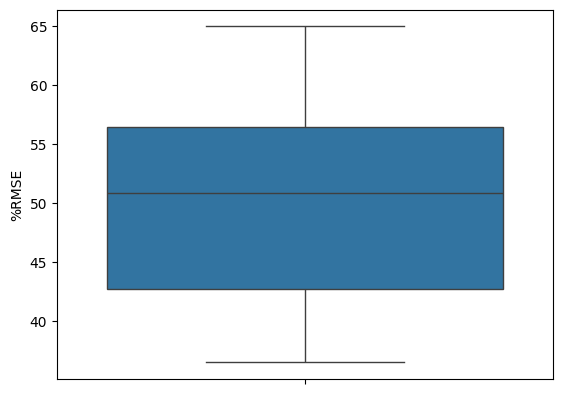

In [11]:
sns.boxplot(data['%RMSE'])